> **DO NOT EDIT IF INSIDE annadl_f19 folder**


# Logistic regression and feed forward NN

Today, you will be tinkering with a pure-python feed forward neural network.
- Part 1.1: Tinker with some visuals
- Part 1.2: Train a pure-Python neural network

**Feedback**: I appreciate all feedback but I know it can be intimidating to say negative things to my face, so I've setup a [thingy](https://ulfaslak.com/vent) on my website where you can vent anonymously. Remember to say you are taking this class because I also use it for other things.

In [1]:
%matplotlib inline

import numpy as np
import random
import matplotlib.pylab as plt
from scipy.interpolate import interp1d

## Exercises

### Part 1.1: Tinker with some visuals

Before we dive in to the code, it's really important that our intuition about what neural networks are doing is as good as possible. And the best (and most fun) way to do that is to play around and with things a bit, so go familiarize yourself with the [Tensorflow Playground](https://playground.tensorflow.org/), slide some knobs and pull some levers.

> **Ex. 1.1.1** Using [the dataset](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.42272&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) with the two well-seperate guassian distributions, create the minimal neural network that seperates the clusters. You can report your answer with a link (the URL on playground.tensorflow.org changes as you update the network, so at any time you can use the link to show others what you have created).

2 input neruons, 1 hidden layer with 1 neuron

https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=1&seed=0.42272&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

> **Ex. 1.1.2** Using [the dataset](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.16631&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) with the hard-to-seperate circles, create the minimal neural network that seperates the clusters. Again, report your answer with a link.

2 input neurons, 2 hidden layers, first with 3 neurons, second with 1 neuron

https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=3,1&seed=0.16631&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

> **Ex. 1.1.3** See if you can create a network that performs well on the [the dataset](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.08961&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) with the intertwined spirals. If possible, include in your answer not only the link but also a screenshot of the scatter plot.

7 input neurons, 2 hidden layers, first with 8 neurons, second with 1 neuron

https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=8,1&seed=0.08961&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false

### Part 1.2: A pure-Python neural network

Now, let's inspect Michael Nielsen's neural network. He ends the first chapter of his book by implementing all the stuff he went through, and below I've synthesized this code into a single working example, with some minor readibility edits and updates so it works in Python 3.

In [2]:
# Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z) * (1 - sigmoid(z))

def step(z, threshold=0.5):
    if z > threshold:
        return 1
    return 0

# Feed forward neural network class
class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        
        self.num_layers = len(sizes)
        self.sizes = sizes
        
        # Q: Print these out, explain their contents. You can instantiate a network by
        # doing `net = Network([2, 3, 1])`, and then printing `net.biases`.
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        
        # Q: What is `a`? How many iterations will this loop run? For a `sizes=[2, 3, 1]`
        # network, what is the shape of `a` at each iteration?
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a) + b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None, silent=False):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        
        # Ulf: For now we just treat this function as a black box.
        
        n = len(training_data)
        if test_data:
            n_test = len(test_data)
        
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)
            ]
            
            # Q: And what does this step do?
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            
            if not silent:
                if test_data:
                    print("Epoch {0}: {1} / {2}".format(j, self.evaluate(test_data), n_test))
                else:
                    print("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        
        # Ulf: For now we just treat this function as a black box.

        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
            
        self.weights = [
            w - eta / len(mini_batch) * nw
            for w, nw in zip(self.weights, nabla_w)
        ]
        self.biases = [
            b - eta / len(mini_batch) * nb
            for b, nb in zip(self.biases, nabla_b)
        ]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        
        # Ulf: For now we just treat this function as a black box.
        
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book. Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on. It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return nabla_b, nabla_w

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        if self.sizes[-1] == 1:
            test_results = [
                (step(self.feedforward(x)), y)
                for x, y in test_data
            ]
        else:
            test_results = [
                (np.argmax(self.feedforward(x)), y)
                for x, y in test_data
            ]
        return sum(int(y_pred == y) for (y_pred, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return output_activations - y

> **Ex. 1.2.1** I want you to inspect the code and gain an understanding of what happend in the `__init__` `feedforward` methods.
For now we treat the rest of the class as a black box.
I've inserted a number of questions as comments in the code and each one starts like `"# Q: "`.
You should now (starting from the top), write (or code) down the answer to each one of them.
>
> *Hint*: You need to closely follow the code. You can verify that your idea of what a variable contains is correct, if you print it. Simply create an instance of the network and you will be able to access the variables of that instance to see what they look like. Example:
>
>     net = Network([2, 3, 1])
>     net.biases  # this gets you the biases property of the network

In [3]:
# Q: Print these out, explain their contents. You can instantiate a network by
# doing `net = Network([2, 3, 1])`, and then printing `net.biases`.
net = Network([2, 3, 1])
print("bias:",net.biases)
print("weight:",net.weights)

# these are the random weights and biases set initialy for the neural network. They can be set randomly because
# it will eventually converge to the correct values when trained


# Q: What is `a`? How many iterations will this loop run? For a `sizes=[2, 3, 1]`
# network, what is the shape of `a` at each iteration?
# 'a' is the input from the previous neruon and will be fed forward to the next neruon. `a` will be multiplied by
# its respective weight and added to the bias, then passed to the sigmoid function. This runs as many itterations
# as there are neurons in the layer


# Q: And what does this step do (minibatch)?
# earlier the training data was broken up into a set of minibatches according to the batch size, the next step
# trains the neural net on different sets of minibatches at each itteration which will update the weights of the 
# function each pass

bias: [array([[ 1.60710733],
       [ 0.51527287],
       [-1.64671529]]), array([[1.10954723]])]
weight: [array([[-1.00694494,  1.61770799],
       [ 0.91679494, -0.70283535],
       [ 0.6843246 ,  0.2068349 ]]), array([[-1.0469406 ,  0.42232118,  1.75311176]])]


#### Classifying data

Now let's use this network to classify some points. Remember the examples from my lecture with the two cluster? Below you get some code for generating data like that.

In [4]:
def generate_X_linear(N=200):
    X = np.vstack([
        np.random.normal([-2, -2], 1, size=(int(N/2), 2)),
        np.random.normal([2, 2], 1, size=(int(N/2), 2))
    ])

    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)
    
    return X, y

def generate_X_nonlinear(N=200, R=5):
    X_inner = np.random.normal([0, 0], 1, size=(int(N/2), 2))

    X_outer = np.array([
        [R*np.cos(theta), R*np.sin(theta)]
        for theta in np.linspace(0, 2 * np.pi, int(N/2))
    ]) + np.random.randn(int(N/2), 2)

    X = np.vstack([X_inner, X_outer])
    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)
    
    return X, y

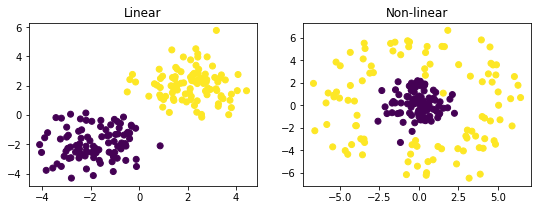

In [5]:
plt.figure(figsize=(9, 3))

X, y = generate_X_linear()
plt.subplot(1, 2, 1)
plt.title("Linear", fontsize=12)
plt.scatter(X[:, 0], X[:, 1], c=list(y.reshape(-1)))

X, y = generate_X_nonlinear()
plt.subplot(1, 2, 2)
plt.title("Non-linear", fontsize=12)
plt.scatter(X[:, 0], X[:, 1], c=list(y.reshape(-1)))

plt.show()

The data needs to be formatted a little different when we give it to Nielsen's code. Basically, it asks for (x, y) tuple pairs, so in each tuple you have a datapoint and it's label. Furthermore, both x and y must be vertical vectors (remember why?). The function below takes `X` and `y` and returns the data in this format:

In [6]:
def prepare_data(X, y):
    """Format the dataset X and y so it fits with Nielsen's code."""
    return [
        (X[i].reshape(-1, 1), y[i].reshape(-1, 1))  # our tuple (x, y)
        for i in range(len(y))
    ]

Also, for the next exercise, you may find the following function useful.

In [7]:
class cmap_in_range:
    """Create map to range of colors inside given domain.

    Example
    -------
    >>> cmap = cmap_in_range([0, 1])
    >>> cmap(0.1)
    (0.30392156862745101, 0.30315267411304353, 0.98816547208125938, 1.0)
    """
    def __init__(self, cmap_domain, cmap_range=[0, 1], cmap_style='rainbow'):
        self.cmap_domain = cmap_domain
        self.cmap_range = cmap_range
        self.m = interp1d(cmap_domain, cmap_range)
        self.cmap = plt.get_cmap(cmap_style)
        
    def __call__(self, value):
        if not self.cmap_domain[0] <= value <= self.cmap_domain[1]:
            raise Exception("Value must be inside cmap_domain.")
        return self.cmap(self.m(value))

> **Ex. 1.2.2**: Create a neural network with `sizes=[2, 1]`. This is actually just our most basic Perceptron model with two inputs and a single output. Generate 1e5 training datapoints and 1e4 testing datapoints using the `generate_X_linear` function, and fit the neural network to this data. Once you've fitted the network, make two plots of your test datapoints, one where points are colored by predictions and another where points are colored by their true labels. Can you say something about the points that are being mislabeled?
>
>*Hint*: You'll probably find some of Nielsen's examples from [Chapter 1](http://neuralnetworksanddeeplearning.com/chap1.html) in his book useful. Also, note that predictions are values between 0 and 1, not hard 0s and 1s, due to the sigmoid activation function. You can deal with this however you like when you color the points by prediction.

Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Epoch 6 complete
Epoch 7 complete
Epoch 8 complete
Epoch 9 complete
Epoch 10 complete
Epoch 11 complete
Epoch 12 complete
Epoch 13 complete
Epoch 14 complete
Epoch 15 complete
Epoch 16 complete
Epoch 17 complete
Epoch 18 complete
Epoch 19 complete
Epoch 20 complete
Epoch 21 complete
Epoch 22 complete
Epoch 23 complete
Epoch 24 complete
Epoch 25 complete
Epoch 26 complete
Epoch 27 complete
Epoch 28 complete
Epoch 29 complete
Epoch 30 complete
Epoch 31 complete
Epoch 32 complete
Epoch 33 complete
Epoch 34 complete
Epoch 35 complete
Epoch 36 complete
Epoch 37 complete
Epoch 38 complete
Epoch 39 complete
Epoch 40 complete
Epoch 41 complete
Epoch 42 complete
Epoch 43 complete
Epoch 44 complete
Epoch 45 complete
Epoch 46 complete
Epoch 47 complete
Epoch 48 complete
Epoch 49 complete
Epoch 50 complete
Epoch 51 complete
Epoch 52 complete
Epoch 53 complete
Epoch 54 complete
Epoch 55 complete
Ep

Epoch 464 complete
Epoch 465 complete
Epoch 466 complete
Epoch 467 complete
Epoch 468 complete
Epoch 469 complete
Epoch 470 complete
Epoch 471 complete
Epoch 472 complete
Epoch 473 complete
Epoch 474 complete
Epoch 475 complete
Epoch 476 complete
Epoch 477 complete
Epoch 478 complete
Epoch 479 complete
Epoch 480 complete
Epoch 481 complete
Epoch 482 complete
Epoch 483 complete
Epoch 484 complete
Epoch 485 complete
Epoch 486 complete
Epoch 487 complete
Epoch 488 complete
Epoch 489 complete
Epoch 490 complete
Epoch 491 complete
Epoch 492 complete
Epoch 493 complete
Epoch 494 complete
Epoch 495 complete
Epoch 496 complete
Epoch 497 complete
Epoch 498 complete
Epoch 499 complete
Epoch 500 complete
Epoch 501 complete
Epoch 502 complete
Epoch 503 complete
Epoch 504 complete
Epoch 505 complete
Epoch 506 complete
Epoch 507 complete
Epoch 508 complete
Epoch 509 complete
Epoch 510 complete
Epoch 511 complete
Epoch 512 complete
Epoch 513 complete
Epoch 514 complete
Epoch 515 complete
Epoch 516 co

Epoch 934 complete
Epoch 935 complete
Epoch 936 complete
Epoch 937 complete
Epoch 938 complete
Epoch 939 complete
Epoch 940 complete
Epoch 941 complete
Epoch 942 complete
Epoch 943 complete
Epoch 944 complete
Epoch 945 complete
Epoch 946 complete
Epoch 947 complete
Epoch 948 complete
Epoch 949 complete
Epoch 950 complete
Epoch 951 complete
Epoch 952 complete
Epoch 953 complete
Epoch 954 complete
Epoch 955 complete
Epoch 956 complete
Epoch 957 complete
Epoch 958 complete
Epoch 959 complete
Epoch 960 complete
Epoch 961 complete
Epoch 962 complete
Epoch 963 complete
Epoch 964 complete
Epoch 965 complete
Epoch 966 complete
Epoch 967 complete
Epoch 968 complete
Epoch 969 complete
Epoch 970 complete
Epoch 971 complete
Epoch 972 complete
Epoch 973 complete
Epoch 974 complete
Epoch 975 complete
Epoch 976 complete
Epoch 977 complete
Epoch 978 complete
Epoch 979 complete
Epoch 980 complete
Epoch 981 complete
Epoch 982 complete
Epoch 983 complete
Epoch 984 complete
Epoch 985 complete
Epoch 986 co

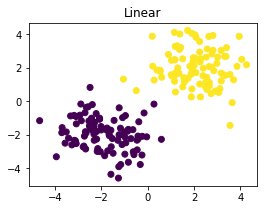

In [8]:
#SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None, silent=False):

lNet = Network([2,1])

plt.figure(figsize=(9, 3))

X, y = generate_X_linear()
plt.subplot(1, 2, 1)
plt.title("Linear", fontsize=12)
plt.scatter(X[:, 0], X[:, 1], c=list(y.reshape(-1)))
data1 = prepare_data(X,y)

lNet.SGD(data1, 1000, 3, 0.1)

In [9]:
result1 = lNet.evaluate(data1)
print(result1)
print("Network has ",result1/200," accuracy ")

200
Network has  1.0  accuracy 


Epoch 0 complete
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Epoch 6 complete
Epoch 7 complete
Epoch 8 complete
Epoch 9 complete
Epoch 10 complete
Epoch 11 complete
Epoch 12 complete
Epoch 13 complete
Epoch 14 complete
Epoch 15 complete
Epoch 16 complete
Epoch 17 complete
Epoch 18 complete
Epoch 19 complete
Epoch 20 complete
Epoch 21 complete
Epoch 22 complete
Epoch 23 complete
Epoch 24 complete
Epoch 25 complete
Epoch 26 complete
Epoch 27 complete
Epoch 28 complete
Epoch 29 complete
Epoch 30 complete
Epoch 31 complete
Epoch 32 complete
Epoch 33 complete
Epoch 34 complete
Epoch 35 complete
Epoch 36 complete
Epoch 37 complete
Epoch 38 complete
Epoch 39 complete
Epoch 40 complete
Epoch 41 complete
Epoch 42 complete
Epoch 43 complete
Epoch 44 complete
Epoch 45 complete
Epoch 46 complete
Epoch 47 complete
Epoch 48 complete
Epoch 49 complete
Epoch 50 complete
Epoch 51 complete
Epoch 52 complete
Epoch 53 complete
Epoch 54 complete
Epoch 55 complete
Ep

Epoch 444 complete
Epoch 445 complete
Epoch 446 complete
Epoch 447 complete
Epoch 448 complete
Epoch 449 complete
Epoch 450 complete
Epoch 451 complete
Epoch 452 complete
Epoch 453 complete
Epoch 454 complete
Epoch 455 complete
Epoch 456 complete
Epoch 457 complete
Epoch 458 complete
Epoch 459 complete
Epoch 460 complete
Epoch 461 complete
Epoch 462 complete
Epoch 463 complete
Epoch 464 complete
Epoch 465 complete
Epoch 466 complete
Epoch 467 complete
Epoch 468 complete
Epoch 469 complete
Epoch 470 complete
Epoch 471 complete
Epoch 472 complete
Epoch 473 complete
Epoch 474 complete
Epoch 475 complete
Epoch 476 complete
Epoch 477 complete
Epoch 478 complete
Epoch 479 complete
Epoch 480 complete
Epoch 481 complete
Epoch 482 complete
Epoch 483 complete
Epoch 484 complete
Epoch 485 complete
Epoch 486 complete
Epoch 487 complete
Epoch 488 complete
Epoch 489 complete
Epoch 490 complete
Epoch 491 complete
Epoch 492 complete
Epoch 493 complete
Epoch 494 complete
Epoch 495 complete
Epoch 496 co

Epoch 891 complete
Epoch 892 complete
Epoch 893 complete
Epoch 894 complete
Epoch 895 complete
Epoch 896 complete
Epoch 897 complete
Epoch 898 complete
Epoch 899 complete
Epoch 900 complete
Epoch 901 complete
Epoch 902 complete
Epoch 903 complete
Epoch 904 complete
Epoch 905 complete
Epoch 906 complete
Epoch 907 complete
Epoch 908 complete
Epoch 909 complete
Epoch 910 complete
Epoch 911 complete
Epoch 912 complete
Epoch 913 complete
Epoch 914 complete
Epoch 915 complete
Epoch 916 complete
Epoch 917 complete
Epoch 918 complete
Epoch 919 complete
Epoch 920 complete
Epoch 921 complete
Epoch 922 complete
Epoch 923 complete
Epoch 924 complete
Epoch 925 complete
Epoch 926 complete
Epoch 927 complete
Epoch 928 complete
Epoch 929 complete
Epoch 930 complete
Epoch 931 complete
Epoch 932 complete
Epoch 933 complete
Epoch 934 complete
Epoch 935 complete
Epoch 936 complete
Epoch 937 complete
Epoch 938 complete
Epoch 939 complete
Epoch 940 complete
Epoch 941 complete
Epoch 942 complete
Epoch 943 co

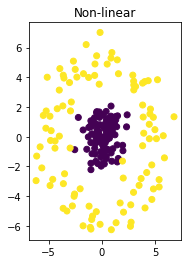

In [10]:

nlNet = Network([2,1])

nl_X, nl_y = generate_X_nonlinear()
plt.subplot(1, 2, 2)
plt.title("Non-linear", fontsize=12)
plt.scatter(nl_X[:, 0], nl_X[:, 1], c=list(y.reshape(-1)))
data2 = prepare_data(nl_X,nl_y)

nlNet.SGD(data2, 1000, 3, 0.1)



In [11]:
result2 = nlNet.evaluate(data2)
print(result2)
print("Network has ",result2/200," result accuracy ")

106
Network has  0.53  result accuracy 


200
200
200


ValueError: 'c' argument has 200 elements, which is not acceptable for use with 'x' with size 200, 'y' with size 200.

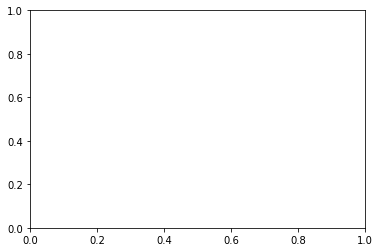

In [24]:
cmap = cmap_in_range([0, 1])
color = []



for i in nl_X:
    color.append(cmap(nlNet.feedforward(i)))
    
print(len(color))
print(len(nl_X[:, 0]))
print(len(nl_X[:, 1]))


plt.scatter(nl_X[:, 0], nl_X[:, 1], c=color)

#print(c)
        

> **Ex. 1.2.3**: Now we want to do the same thing as in Ex. 1.2.2, but with the data generated with the `generate_X_nonlinear` function.
>
>*Hint*: Think back to the slides to figure out what `sizes` should be.